<a href="https://colab.research.google.com/github/macorony/ConvNet_Examples/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet architecture

In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
# gpu available or not
print("GPU is available:", torch.cuda.is_available())

GPU is available: False


In [130]:
transform = transforms.Compose([transforms.ToTensor()])

In [131]:
train_set = torchvision.datasets.FashionMNIST('./data/fashion', train=True, transform=transform, download=True)
test_set = torchvision.datasets.FashionMNIST('./data/fashion', train=False, transform=transform, download=True)

In [132]:
print(len(train_set)%64)

32


In [133]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=True, num_workers=2)

tensor([7, 7, 1, 9, 0, 9, 0, 7, 4, 4])
torch.Size([10, 1, 28, 28])


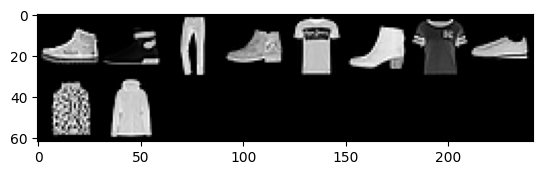

In [134]:
# Visulize
images, labels = next(iter(train_loader))
print(labels)
print(images.shape)
grid = torchvision.utils.make_grid(images)
plt.imshow(grid.permute(1,2,0))


In [135]:
# define LeNet in 2 ways
class LeNet_1(nn.Module):
  def __init__(self):
    super(LeNet_1, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)
    self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
    self.fc1 = nn.Linear(256, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.pooling(F.relu(self.conv1(x)))
    x = self.pooling(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
LeNet_1 = LeNet_1()

In [136]:
class LeNet_2(nn.Module):
  def __init__(self):
    super(LeNet_2, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc1 = nn.Linear(256, 120)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(120, 84)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    out = self.fc3(x)
    return out
LeNet_2 = LeNet_2()


In [137]:
# Define a loss function and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer_1 = optim.SGD(LeNet_1.parameters(), lr=0.001, momentum=0.9)
optimizer_2 = optim.SGD(LeNet_2.parameters(), lr=0.001, momentum=0.9)

In [144]:
def model_training(loader, nnModel, EPOCH, optimizer, loss_function):
  nnModel.train()
  for epoch in range(EPOCH):
    print(f'Start to train the epoch {epoch+1}.')
    running_loss = 0
    for i, data in enumerate(loader):
      inputs, labels = data
      optimizer.zero_grad()
      outputs = nnModel(inputs)
      loss = loss_function(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss
      if i % 1000 == 999:
        print(f"At {i+1}th batch the loss is {running_loss}.")
        running_loss = 0
  print('Finish the training.')


In [140]:
model_training(train_loader, LeNet_1, EPOCH=5, optimizer=optimizer_1, loss_function=loss_func)

Start to train the epoch 1
At 1000th batch the loss is 2070.3310546875.
At 2000th batch the loss is 959.7903442382812.
At 3000th batch the loss is 783.0213012695312.
At 4000th batch the loss is 696.8798828125.
At 5000th batch the loss is 639.1788330078125.
At 6000th batch the loss is 615.6805419921875.
Start to train the epoch 2
At 1000th batch the loss is 559.7869873046875.
At 2000th batch the loss is 528.6220092773438.
At 3000th batch the loss is 530.5863037109375.
At 4000th batch the loss is 502.1939392089844.
At 5000th batch the loss is 476.7198181152344.
At 6000th batch the loss is 470.4894104003906.
Start to train the epoch 3
At 1000th batch the loss is 446.9589538574219.
At 2000th batch the loss is 459.76800537109375.
At 3000th batch the loss is 439.7384338378906.
At 4000th batch the loss is 410.07513427734375.
At 5000th batch the loss is 409.1357421875.
At 6000th batch the loss is 407.1423034667969.
Start to train the epoch 4
At 1000th batch the loss is 408.8067932128906.
At 20

In [113]:
# Training loop for lenet1
for epoch in range(5):
  running_loss = 0
  for i, data in enumerate(train_loader):
    inputs, labels = data
    optimizer_1.zero_grad()
    outputs = LeNet_1(inputs)
    loss = loss_func(outputs, labels)
    loss.backward()
    optimizer_1.step()
    running_loss += loss
    if i % 1000 == 999:
      print(f"The loss is {running_loss}.")
      running_loss = 0
print('Finish Training')

The loss is 533.376708984375.
The loss is 520.67041015625.
The loss is 523.5036010742188.
The loss is 484.1070251464844.
The loss is 457.66473388671875.
The loss is 462.3052673339844.
The loss is 432.06439208984375.
The loss is 423.1833190917969.
The loss is 423.54510498046875.
The loss is 429.53314208984375.
The loss is 408.84033203125.
The loss is 402.97222900390625.
The loss is 387.8798828125.
The loss is 387.942138671875.
The loss is 371.29278564453125.
The loss is 385.2573547363281.
The loss is 374.276123046875.
The loss is 372.9489440917969.
The loss is 372.5985412597656.
The loss is 350.68743896484375.
The loss is 346.87847900390625.
The loss is 353.1541748046875.
The loss is 339.72442626953125.
The loss is 361.1457214355469.
The loss is 337.81829833984375.
The loss is 333.2338562011719.
The loss is 339.3852844238281.
The loss is 328.21844482421875.
The loss is 326.43475341796875.
The loss is 332.552490234375.
Finish Training


In [145]:
# model validation
def model_validation(test_loader, nnModel):
  nnModel.train(False)
  correct = 0
  total = 0
  with torch.no_grad():
    for i, data in enumerate(test_loader):
      iutputs, labels = data
      outputs = nnModel(inputs)
      _, predicts = torch.max(outputs,1)
      total += labels.size(0)
      correct += (predicts == labels).sum().item()
  print(correct/total)

In [146]:
model_validation(test_loader=test_loader, nnModel=LeNet_1)

0.1024


In [141]:
# validation
correct = 0
total = 0
with torch.no_grad():
  for i, data in enumerate(test_loader):
    iutputs, labels = data
    outputs = LeNet_1(inputs)
    _, predicts = torch.max(outputs,1)
    total += labels.size(0)
    correct += (predicts == labels).sum().item()
print(correct/total)

0.0991


In [148]:
total

10000

In [116]:
# Training loop for lenet2
for epoch in range(5):
  running_loss = 0
  for i, data in enumerate(train_loader):
    inputs, labels = data
    optimizer_2.zero_grad()
    outputs = LeNet_2(inputs)
    loss = loss_func(outputs, labels)
    loss.backward()
    optimizer_2.step()
    running_loss += loss
    if i % 1000 == 999:
      print(f'The {i+1}th loss is {running_loss}')
      running_loss = 0
  print(f'The epoch {epoch+1} has been finished.')

The 1000th loss is 479.7790222167969
The 2000th loss is 481.0254211425781
The 3000th loss is 468.0447998046875
The 4000th loss is 438.4874572753906
The 5000th loss is 424.71124267578125
The 6000th loss is 420.0774841308594
The epoch 0 has been finished.
The 1000th loss is 417.7610778808594
The 2000th loss is 397.62384033203125
The 3000th loss is 390.8376159667969
The 4000th loss is 384.8647766113281
The 5000th loss is 376.43890380859375
The 6000th loss is 373.7541198730469
The epoch 1 has been finished.
The 1000th loss is 362.57257080078125
The 2000th loss is 363.3929748535156
The 3000th loss is 346.5080261230469
The 4000th loss is 339.8446350097656
The 5000th loss is 345.8026123046875
The 6000th loss is 365.26611328125
The epoch 2 has been finished.
The 1000th loss is 346.64984130859375
The 2000th loss is 324.24725341796875
The 3000th loss is 326.6484680175781
The 4000th loss is 321.3117980957031
The 5000th loss is 326.369384765625
The 6000th loss is 327.4763488769531
The epoch 3 has 

In [117]:
correct = 0
total = 0
for i, data in enumerate(test_loader):
  inputs, labels = data
  outputs = LeNet_2(inputs)
  _, predicts = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicts == labels).sum().item()

print(correct/total)


0.8764
